In [1]:
import pandas as pd
import numpy as np

# 샘플 데이터: 온라인 쇼핑몰 주문 데이터
data = {
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '고객ID': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C', 'B', 'D'],
    '상품카테고리': ['전자제품', '의류', '가구', '전자제품', '의류', '식품', '가구', '식품', '전자제품', '의류'],
    '구매액': [150000, 75000, 220000, 95000, 82000, 45000, 180000, 35000, 120000, 62000],
    '배송지역': ['서울', '부산', '서울', '인천', '서울', '부산', '인천', '서울', '부산', '인천'],
    '할인률': [0.05, 0.1, 0, 0.2, 0.1, 0, 0.05, 0.15, 0.2, 0]
}

df = pd.DataFrame(data)

In [18]:
# 집계 함수 응용
import pandas as pd
import numpy as np

# 샘플 데이터
df = pd.DataFrame({
    '상품ID': ['A001', 'A002', 'A001', 'A003', 'A002', 'A004', 'A003', 'A001', 'A002', 'A004'],
    '판매일자': pd.date_range('2023-01-01', periods=10),
    '판매수량': [5, 3, 7, 2, 4, 6, 3, 8, 5, 4],
    '판매금액': [50000, 30000, 70000, 25000, 40000, 65000, 30000, 80000, 50000, 45000],
    '반품수량': [0, 1, 0, 0, 0, 2, 1, 0, 0, 1],
    '고객평점': [4.5, 3.8, 4.2, 5.0, 4.0, 3.5, 4.2, 4.8, 3.9, 4.1] })

In [21]:

# 그룹별 순위 및 누적 계산
import pandas as pd
import numpy as np

# 샘플 데이터: 부서별 직원 실적
data = {
    '직원ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원', '오민지', '홍길동'],
    '부서': ['영업', '개발', '영업', '인사', '개발', '영업', '개발', '인사', '영업', '개발', '영업', '인사'],
    '월별실적': [120, 85, 95, 110, 75, 135, 95, 110, 115, 90, 125, 100],
    '고객평가': [4.5, 3.8, 4.2, 4.7, 3.9, 4.8, 4.1, 4.3, 4.5, 4.0, 4.6, 4.2]
}

df = pd.DataFrame(data)
print("부서별 직원 실적 데이터:")
df

부서별 직원 실적 데이터:


,직원ID,이름,부서,월별실적,고객평가
0,101,김철수,영업,120,4.5
1,102,이영희,개발,85,3.8
2,103,박민수,영업,95,4.2
3,104,정지영,인사,110,4.7
4,105,최동민,개발,75,3.9
5,106,강준호,영업,135,4.8
6,107,윤서연,개발,95,4.1
7,108,임태혁,인사,110,4.3
8,109,한미래,영업,115,4.5
9,110,송지원,개발,90,4.0


In [27]:
dept_group = df.groupby('부서')

In [32]:
df['부서순위_실적2'] = dept_group['월별실적'].rank( method = 'dense', ascending = False)
df['부서별누적합계'] = df.groupby('부서')['월별실적'].cumsum()
df['부서별누적최대'] = df.groupby('부서')['월별실적'].cummax()

In [34]:
df['부서별누적합계3'] = df.groupby('부서')['월별실적'].cumsum()
df

,직원ID,이름,부서,월별실적,고객평가,부서순위_실적,부서순위_실적2,부서별누적합계,부서별누적최대,부서별누적합계3
0,101,김철수,영업,120,4.5,3.0,3.0,120,120,120
1,102,이영희,개발,85,3.8,3.0,3.0,85,85,85
2,103,박민수,영업,95,4.2,5.0,5.0,215,120,215
3,104,정지영,인사,110,4.7,1.0,1.0,110,110,110
4,105,최동민,개발,75,3.9,4.0,4.0,160,85,160
5,106,강준호,영업,135,4.8,1.0,1.0,350,135,350
6,107,윤서연,개발,95,4.1,1.0,1.0,255,95,255
7,108,임태혁,인사,110,4.3,1.0,1.0,220,110,220
8,109,한미래,영업,115,4.5,4.0,4.0,465,135,465
9,110,송지원,개발,90,4.0,2.0,2.0,345,95,345


In [36]:
# 실습: 매출 데이터 그룹별 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 매출 데이터 생성
np.random.seed(42)

# 날짜 생성 (2023년 전체)
dates = pd.date_range('2023-01-01', '2023-12-31')
n_records = 500

data = {
    '주문ID': np.arange(1001, 1001 + n_records),
    '주문일자': np.random.choice(dates, n_records),
    '고객ID': np.random.choice([f'CUST{i:03d}' for i in range(1, 101)], n_records),
    '상품ID': np.random.choice([f'PROD{i:03d}' for i in range(1, 51)], n_records),
    '카테고리': np.random.choice(['전자제품', '의류', '가구', '식품', '화장품', '도서', '스포츠'], n_records),
    '매출액': np.random.randint(10000, 500000, n_records),
    '수량': np.random.randint(1, 10, n_records),
    '지역': np.random.choice(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원'], n_records),
    '결제방법': np.random.choice(['신용카드', '현금', '체크카드', '휴대폰', '계좌이체'], n_records),
    '고객등급': np.random.choice(['일반', '실버', '골드', 'VIP'], n_records)
}

df = pd.DataFrame(data)
category_sum = df.groupby('카테고리')['매출액'].sum().sort_values(ascending= False)

<Axes: xlabel='카테고리'>

c:\Users\mingyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\mingyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\mingyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\mingyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\mingyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing

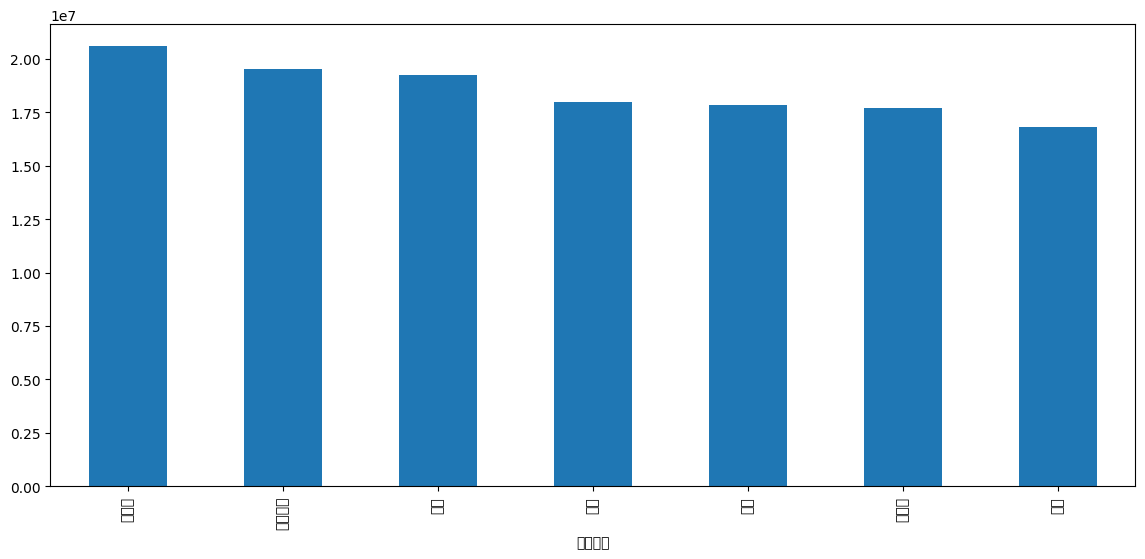

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
category_sum.plot(kind='bar')